In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [15]:
df = pd.read_csv('Dataset.csv', encoding='ISO-8859-1')
df.head()


,doi,polymer(s),is_solvent_blend,solvent(s),solvent_components,solution_concentration_wt%,needle_type,needle_diameter_G,collector_type,rotation_speed_rpm,voltage_kv,flow_rate_ml/h,tip_collector_distance_cm,temperature_c,humidity_%,formation_stable,fiber_diameter_nm,fiber_diameter_variation_nm,tail_observation
0,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",15.0,Single Needle,22.0,Flat,NaN,12.0,2.0,6.0,23.0,45,True,1346.0,812.0,True
1,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",12.0,Single Needle,22.0,Flat,NaN,16.0,2.0,6.0,23.0,45,True,488.0,221.0,False
2,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",15.0,Single Needle,22.0,Flat,NaN,16.0,2.0,10.0,23.0,45,True,823.0,519.0,False
3,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",9.0,Single Needle,22.0,Flat,NaN,12.0,2.0,6.0,23.0,45,True,452.0,236.0,False
4,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",12.0,Single Needle,22.0,Flat,NaN,12.0,2.0,10.0,23.0,45,True,801.0,382.0,False


In [16]:
print(len(df))

819


In [17]:
unique_values = df['polymer(s)'].unique()
print(unique_values)


['CA' 'PAN' 'PCL' 'PDLLA' 'PET' 'PLA' 'PS' 'PVA' 'PVDF' 'PVP' 'Y_PGA'
 'PMMA']


In [18]:
df.describe()

,solution_concentration_wt%,needle_diameter_G,rotation_speed_rpm,voltage_kv,flow_rate_ml/h,tip_collector_distance_cm,temperature_c,fiber_diameter_nm,fiber_diameter_variation_nm
count,819.000000,509.000000,254.000000,819.000000,819.000000,819.000000,603.000000,787.000000,354.000000
mean,15.384969,19.005894,674.811024,17.412821,1.493516,15.820024,22.344942,553.357065,107.807571
std,6.029437,4.465745,792.090687,7.145117,2.797962,6.270511,3.283972,859.227837,130.305647
min,5.000000,7.000000,20.000000,5.000000,0.100000,2.000000,18.000000,55.000000,4.000000
25%,10.000000,14.000000,100.000000,14.000000,0.300000,12.000000,20.000000,229.280000,30.230000
50%,15.000000,21.000000,180.000000,16.000000,0.540000,15.000000,22.000000,330.000000,48.865000
75%,20.000000,22.000000,1000.000000,20.000000,1.080000,18.000000,23.000000,621.000000,113.750000
max,30.300000,26.000000,3000.000000,50.000000,22.000000,50.000000,50.000000,13080.000000,812.000000


In [19]:
polymer_counts = df['polymer(s)'].value_counts()

print(polymer_counts)


polymer(s)
PVDF     351
PVA      150
PVP       96
PAN       62
PS        45
PCL       26
PMMA      20
Y_PGA     18
PDLLA     16
CA        15
PET       12
PLA        8
Name: count, dtype: int64


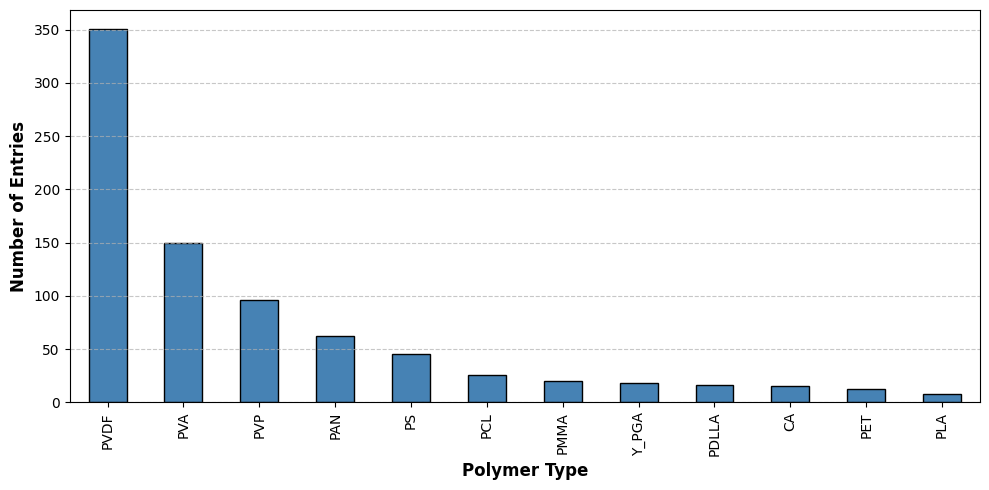

In [20]:
fig, ax = plt.subplots(figsize=(10
                                , 5))

polymer_counts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')

ax.set_xlabel('Polymer Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Entries', fontsize=12, fontweight='bold')
# ax.set_title('Number', fontsize=14, fontweight='bold')

ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [21]:
solvent_counts = df['solvent(s)'].value_counts()

print(solvent_counts)


solvent(s)
DMF                   209
DMAC-ACETONE          135
WATER                 134
DMF-ACETONE           133
ETHANOL                66
DMSO-ACETONE           36
ACETONE                21
TFA                    20
DISTILLED_WATER        19
ACETONE-CHLOROFORM     10
TFA-DSM                 9
AC-DMF                  8
ACETIC_ACID             7
CHLOROFORM-ETHANOL      6
NMP-ACETONE             6
Name: count, dtype: int64


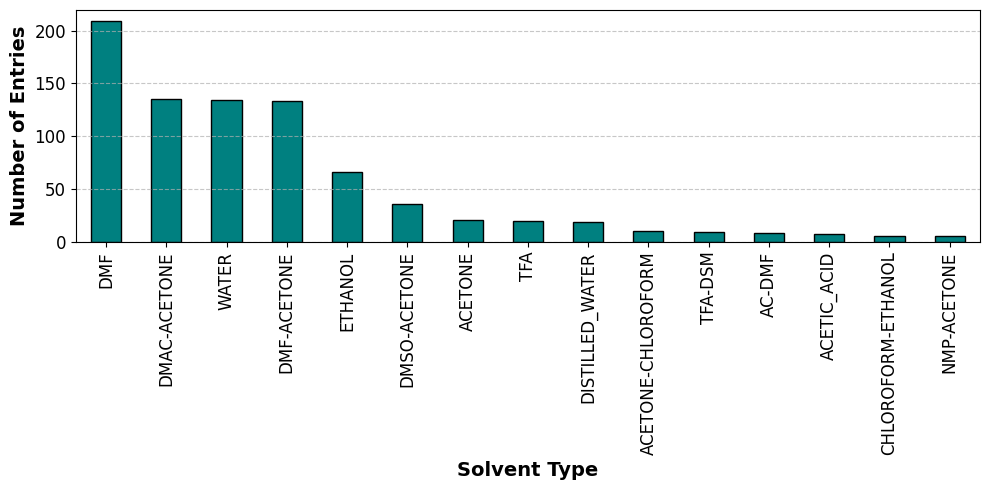

In [22]:

fig, ax = plt.subplots(figsize=(10, 5))

solvent_counts.plot(kind='bar', ax=ax, color='teal', edgecolor='black')

ax.set_xlabel('Solvent Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Entries', fontsize=14, fontweight='bold')

ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [23]:
grouped_polymer_solvent_counts = df.groupby(['polymer(s)', 'solvent(s)']).size().reset_index(name='count')

grouped_polymer_solvent_counts = grouped_polymer_solvent_counts.sort_values(['polymer(s)', 'count'], ascending=[True, False])

grouped_polymer_solvent_counts


,polymer(s),solvent(s),count
0,CA,ACETONE,15
1,PAN,DMF,62
4,PCL,DMF,13
2,PCL,ACETIC_ACID,7
3,PCL,CHLOROFORM-ETHANOL,6
6,PDLLA,ACETONE-CHLOROFORM,10
5,PDLLA,ACETONE,6
8,PET,TFA-DSM,9
7,PET,TFA,3
9,PLA,AC-DMF,8


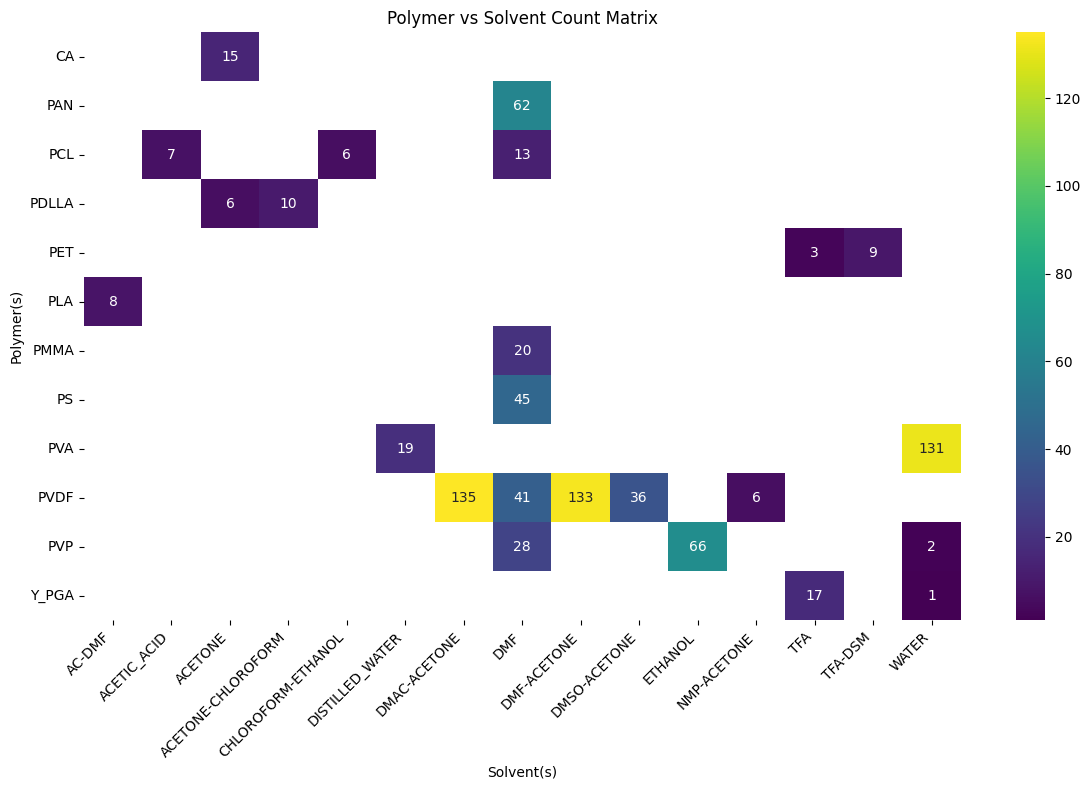

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your grouped data
grouped_polymer_solvent_counts = df.groupby(['polymer(s)', 'solvent(s)']).size().reset_index(name='count')
grouped_polymer_solvent_counts = grouped_polymer_solvent_counts.sort_values(['polymer(s)', 'count'], ascending=[True, False])

# Pivot table for matrix form
matrix_data = grouped_polymer_solvent_counts.pivot(index='polymer(s)', columns='solvent(s)', values='count')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_data, annot=True, fmt='g', cmap='viridis', cbar=True)

plt.title('Polymer vs Solvent Count Matrix')
plt.ylabel('Polymer(s)')
plt.xlabel('Solvent(s)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [25]:
grouped_polymer_solvent = (
    df.groupby('polymer(s)')['solvent(s)']
    .apply(lambda x: ', '.join(sorted(set(x))))
    .reset_index()
    .rename(columns={
        'polymer(s)': 'Polymer',
        'solvent(s)': 'Compatible Solvents'
    })
)

print(grouped_polymer_solvent)


   Polymer                                Compatible Solvents
0       CA                                            ACETONE
1      PAN                                                DMF
2      PCL               ACETIC_ACID, CHLOROFORM-ETHANOL, DMF
3    PDLLA                        ACETONE, ACETONE-CHLOROFORM
4      PET                                       TFA, TFA-DSM
5      PLA                                             AC-DMF
6     PMMA                                                DMF
7       PS                                                DMF
8      PVA                             DISTILLED_WATER, WATER
9     PVDF  DMAC-ACETONE, DMF, DMF-ACETONE, DMSO-ACETONE, ...
10     PVP                                DMF, ETHANOL, WATER
11   Y_PGA                                         TFA, WATER


In [ ]:
# polymers = [
#     "PVDF", "PVA", "PVP", "PAN", "PS", "PCL", "PMMA", "PLA", "Y_PGA", "PDLLA",
#     "CA", "AROMATIC_PI", "PET", "GELATIN", "PA6", "HA", "PEO", "PVC", "NYLON_6",
#     "PSA", "SILK", "PVAC", "TPU", "COLLAGEN"
# ]

# columns_to_describe = ['voltage', 'flow_rate', 'tip_collector_distance', 'needle_diameter', 'solution_concentration', 'temperature', 'humidity', 'fiber_diameter', "fiber_diameter_variation"]

# summary_list = []

# for polymer in polymers:
#     df_poly = df[df["polymer(s)"] == polymer]
#     desc = df_poly[columns_to_describe].describe().T 
#     desc['polymer'] = polymer  # add polymer name as a column
#     summary_list.append(desc.reset_index())

# summary_df = pd.concat(summary_list, ignore_index=True)

# summary_df = summary_df[['polymer', 'index', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# summary_df

KeyError: "None of [Index(['voltage', 'flow_rate', 'tip_collector_distance', 'needle_diameter',\n       'solution_concentration', 'temperature', 'humidity', 'fiber_diameter',\n       'fiber_diameter_variation'],\n      dtype='object')] are in the [columns]"

In [ ]:
print(summary_df)

      polymer                     index  count         mean       std  \
0        PVDF                   voltage  353.0    16.939377  9.143391   
1        PVDF                 flow_rate  353.0     1.164363  1.386665   
2        PVDF    tip_collector_distance  353.0    17.078187  5.996770   
3        PVDF    solution_concentration  353.0    19.264646  4.643181   
4        PVDF               temperature  235.0    22.255319  3.750032   
..        ...                       ...    ...          ...       ...   
163  COLLAGEN    tip_collector_distance    1.0    20.000000       NaN   
164  COLLAGEN    solution_concentration    1.0    10.000000       NaN   
165  COLLAGEN               temperature    1.0    23.000000       NaN   
166  COLLAGEN            fiber_diameter    1.0  1700.000000       NaN   
167  COLLAGEN  fiber_diameter_variation    1.0   500.000000       NaN   

         min     25%     50%      75%      max  
0       5.00    11.5    15.0    20.00    50.00  
1       0.15     0.5     

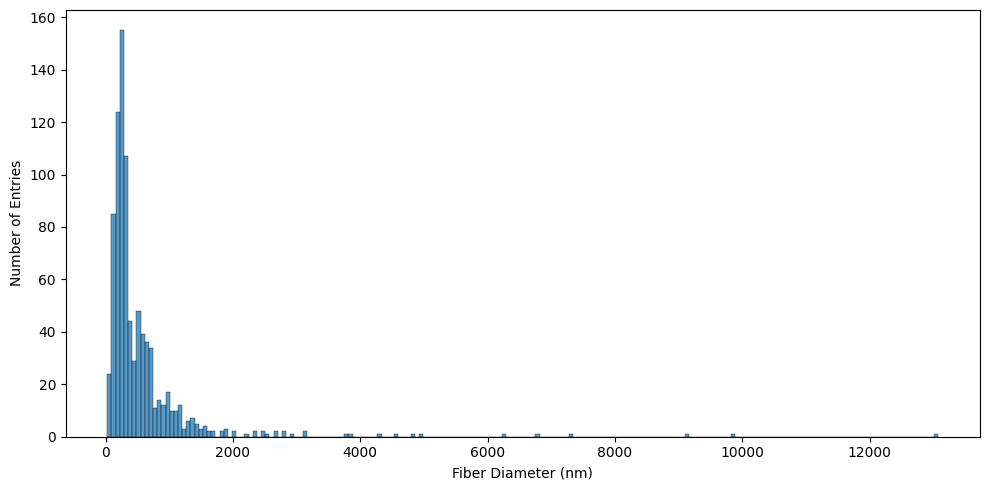

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5)) 
sns.histplot(data=df, x='fiber_diameter', bins=200, kde=False)
plt.xlabel('Fiber Diameter (nm)')
plt.ylabel('Number of Entries')
# plt.title('Histogram of Fiber Diameter Distribution')
plt.tight_layout()
plt.show()

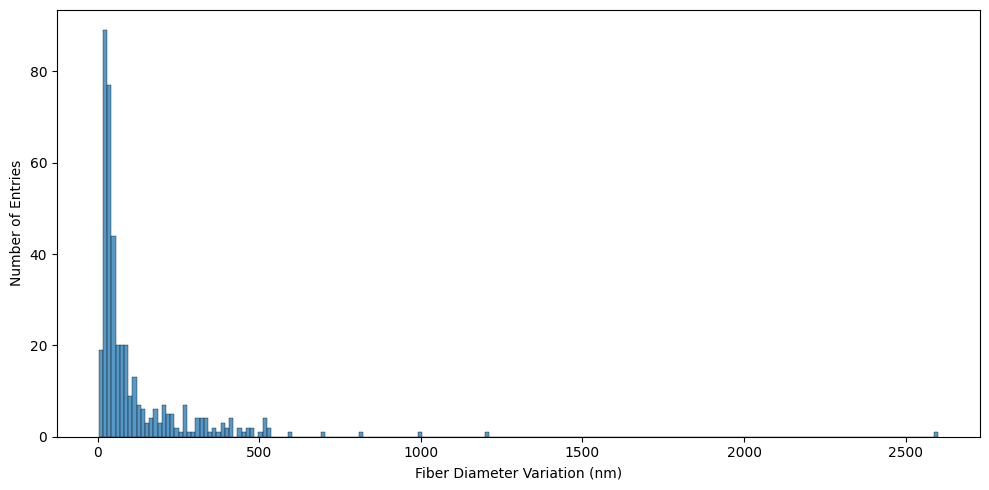

In [ ]:
plt.figure(figsize=(10, 5)) 

sns.histplot(data=df, x='fiber_diameter_variation', bins=200, kde=False)
plt.xlabel('Fiber Diameter Variation (nm)')
plt.ylabel('Number of Entries')
# plt.title('Histogram of Fiber Diameter Variation Distribution')
plt.tight_layout()
plt.show()

In [ ]:

# for polymer in polymers:
#     df_poly = df[df["polymer(s)"] == polymer]
    
#     if df_poly.empty:
#         continue  # Skip if no data
    
#     # Plot histograms for all columns
#     df_poly[columns_to_describe].hist(
#         bins=20, figsize=(15, 10), layout=(3, 3), edgecolor='black'
#     )
#     plt.suptitle(f"Histograms for {polymer}", fontsize=16)
#     plt.tight_layout(rect=[0, 0, 1, 0.95])
#     plt.show()